# Spatial-Temporal Graph Convolutional Networks - Experiments 

Paper: Learning Three Dimensional Tennis Shots Using Graph Convolutional Networks
Technique tested: Spatial-Temporal Graph Convolutional (/Neural) Networks (ST-GCN)

## Paper summary
The paper mentions recording both the player and the racket to identify shots. It tested putting data into the ST-GCN with and without fuzzying of data, where fuzzying returned more accurate results.

### Important pages:
- Description of Input: [2.2. Spatial Temporal Graph]
- Description of Methodology [2.3. Recognition of Tennis Shots (page 5/12)]

## Input
Graph G = (V, E)  
- N -> node for each joint and their changes in their position over time.  
- V -> node set, all joints in a skeleton  
- E -> set of edges

## Data structures
Data structure for containing data information

In [84]:
class Joint:
    
    class Cartesian:

        def __init__(self, x:int, y:int, z:int):
            self.x = x
            self.y = y
            self.z = z

    def __init__(self, id:str) -> None:
        self.id = id #  name of the joint
        self.coordinates = [] #  list of coordinate sets
    
    def add(self, x:int, y:int, z:int) -> None:
        self.coordinates.append(self.Cartesian(x,y,z))


class Edge:

    def __init__(self, joint1:Joint, joint2:Joint) -> None:
        self.joint1 = joint1
        self.joint2 = joint2


class Joint_set:

    def __init__(self) -> None:
        self.set = {}

    def add(self, joint:Joint) -> None:
        self.set[joint.id] = joint


class Edge_set:
    
    def __init__(self, joint_set:Joint_set) -> None:
        self.joint_set = joint_set
        self.edges = []
        self.taken_connections = {} # only to avoid long search times


    def add(self, joint1_name:str, joint2_name:str) -> None:
        for edge in self.edges:
            if edge.joint1.id == joint2_name and edge.joint2.id == joint1_name: # avoid duplication
                return
        # Change to a more efficient search if necessary. Rn not needed because the list of edges is small (>~50)
        self.edges.append(Edge(self.joint_set.set[joint1_name], self.joint_set.set[joint2_name]))



## Intialisation

To be edited depending on the data given, i.e. the joints and edges involved.

In [85]:
# Initialisation methods

def init_set(joint_name_set:list) -> Joint_set:
    joints = Joint_set()
    for name in joint_name_set:
        joints.add(Joint(name))
    return joints


def init_edges(joint_set:Joint_set, connections:dict) -> Edge_set:
    edges = Edge_set(joint_set)
    for joint in joint_set.set:
        joint_id = joint
        for connection_id in connections[joint_id]: # nested while loop acceptable as maximum 3 iterations (as seen in the dataset)
            edges.add(joint_id, connection_id)
    return edges

# should draw the edges and joints created just to make sure everything's been done correctly

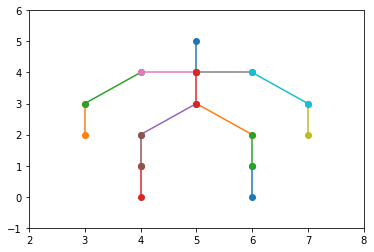

In [86]:
# Testing initlialisation & data structure integrity

import matplotlib.pyplot as plt

connection_info = {
    "HEAD" : ["NECK"],
    "LEFT_ELBOW" : ["LEFT_HAND", "LEFT_SHOULDER"], 
    "LEFT_FOOT" : ["LEFT_KNEE"],
    "LEFT_HAND" :  ["LEFT_ELBOW"],
    "LEFT_HIP" : ["TORSO", "LEFT_KNEE"],
    "LEFT_KNEE" : ["LEFT_HIP", "LEFT_FOOT"],
    "LEFT_SHOULDER" : ["NECK", "LEFT_ELBOW"],
    "NECK" : ["HEAD", "LEFT_SHOULDER", "RIGHT_SHOULDER"],
    "RIGHT_ELBOW" : ["RIGHT_HAND", "RIGHT_SHOULDER"],
    "RIGHT_FOOT" : ["RIGHT_KNEE"],
    "RIGHT_HAND" : ["RIGHT_ELBOW"],
    "RIGHT_HIP" : ["TORSO", "RIGHT_KNEE"],
    "RIGHT_KNEE" : ["RIGHT_HIP", "RIGHT_FOOT"],
    "RIGHT_SHOULDER" : ["NECK", "RIGHT_ELBOW"],
    "TORSO" : ["NECK", "LEFT_HIP", "RIGHT_HIP"]
}

joint_names = list(connection_info.keys())
joints = init_set(joint_names)
edges = init_edges(joints, connection_info)

joints.set["HEAD"].add(5,5,0)
joints.set["NECK"].add(5,4,0)
joints.set["TORSO"].add(5,3,0)
joints.set["LEFT_HIP"].add(4,2,0)
joints.set["LEFT_KNEE"].add(4,1,0)
joints.set["LEFT_FOOT"].add(4,0,0)
joints.set["RIGHT_HIP"].add(6,2,0)
joints.set["RIGHT_KNEE"].add(6,1,0)
joints.set["RIGHT_FOOT"].add(6,0,0)
joints.set["LEFT_SHOULDER"].add(4,4,0)
joints.set["LEFT_ELBOW"].add(3,3,0)
joints.set["LEFT_HAND"].add(3,2,0)
joints.set["RIGHT_SHOULDER"].add(6,4,0)
joints.set["RIGHT_ELBOW"].add(7,3,0)
joints.set["RIGHT_HAND"].add(7,2,0)

plt.xlim(2, 8)
plt.ylim(-1, 6)

for edge in edges.edges:
    x1 = edge.joint1.coordinates[0].x
    y1 = edge.joint1.coordinates[0].y
    x2 = edge.joint2.coordinates[0].x
    y2 = edge.joint2.coordinates[0].y
    plt.plot([x1,x2], [y1,y2], marker='o')

plt.show()
